# Kepler Solver

In [1]:
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

Date on which REBOUND was compiled: May 15 2018 11:48:39.


### Next up, we create a `Simulation` object. This is needed because the Kepler solver needs to know the gravitational constant (which is a property of the `Simulation` object and defaults to 1). 

In [2]:
sim = rebound.Simulation()

### Next up, we create the particle we want to evolver with the Kepler solver. Only the x, y, z, and vx, vy, vz properties of this particle matter.

In [3]:
p = rebound.Particle(x=1., vy=1.)
print(p.xyz)
print(p.vxyz)

[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]


### The mass of the particle is not used by the Kepler solver. It expects a mass as a separate argument when calling it (this allows you to use different coordinates systems). Here, we simply use:

In [4]:
M = 1.

### The last argument that we pass to the Kepler solver is the timestep. As a test, let's evolve for one full orbit. In units where $G=1$ and the mass in the system is $M=1$, an orbit takes $2\pi$ time units.

In [5]:
dt = 2.*np.pi

### We can now finally call the Kepler solver with this command:

In [6]:
rebound.clibrebound.reb_whfast_kepler_solver(byref(sim),byref(p),c_double(M),c_int(0),c_double(dt));

### The function will not return anything, but it will change the Particle that we pass it. To see the difference, let us print out the coordinates of `p`:

In [7]:
print(p.xyz)
print(p.vxyz)

[1.0, 4.440892098500626e-15, 0.0]
[-8.881784197001249e-16, 1.0, 0.0]


### As you can see we almost get exactly back what we put in, except a small difference at the 15th or 16th digit. This is because of floating point precision, which limits us to a relative precision of $\approx 10^{-16}$. 


# Plotting Trajectories

## Dimensionless Units $(AU, Msun, yr/2\pi)$

Date on which REBOUND was compiled: May 15 2018 11:48:39.
G = 1.00000e+00


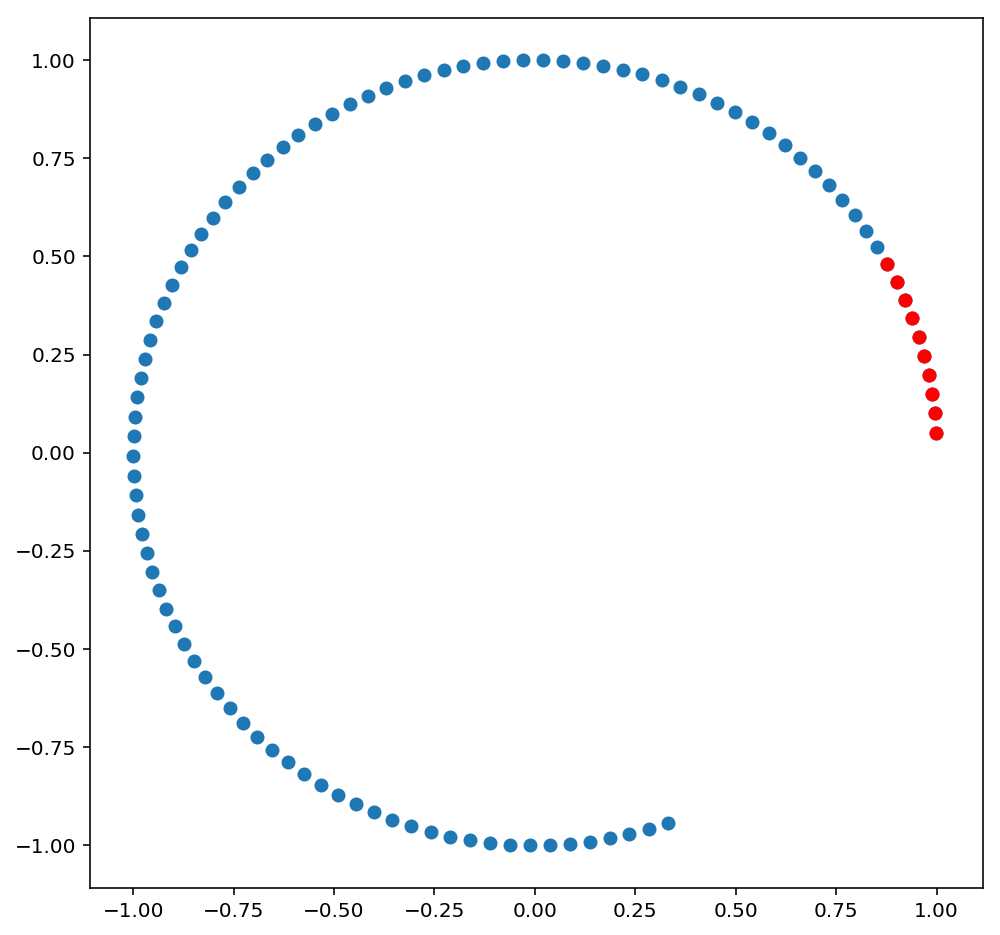

CPU times: user 797 ms, sys: 51.2 ms, total: 848 ms
Wall time: 850 ms


In [8]:
%%time
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

sim = rebound.Simulation()
print('G = {0:1.5e}'.format(sim.G))

p = rebound.Particle(x=1., vy=1.)
M = 1.

nsamples = 101
xyz = np.zeros((nsamples, 3))
vxyz = np.zeros((nsamples, 3))

dt = 0.05

for i in range(nsamples):
    rebound.clibrebound.reb_whfast_kepler_solver(byref(sim),byref(p),c_double(M),c_int(0),c_double(dt));
    xyz[i] = p.xyz
    vxyz[i] = p.vxyz

fig,axs = plt.subplots(1,1, figsize=(8,8))
axs.scatter(xyz[:,0], xyz[:,1])
axs.scatter(xyz[:10,0], xyz[:10,1], c='r')
plt.show()

## Gauss Units $(AU, Msun, Days)$

Date on which REBOUND was compiled: May 15 2018 11:48:39.
G = 0.00029591


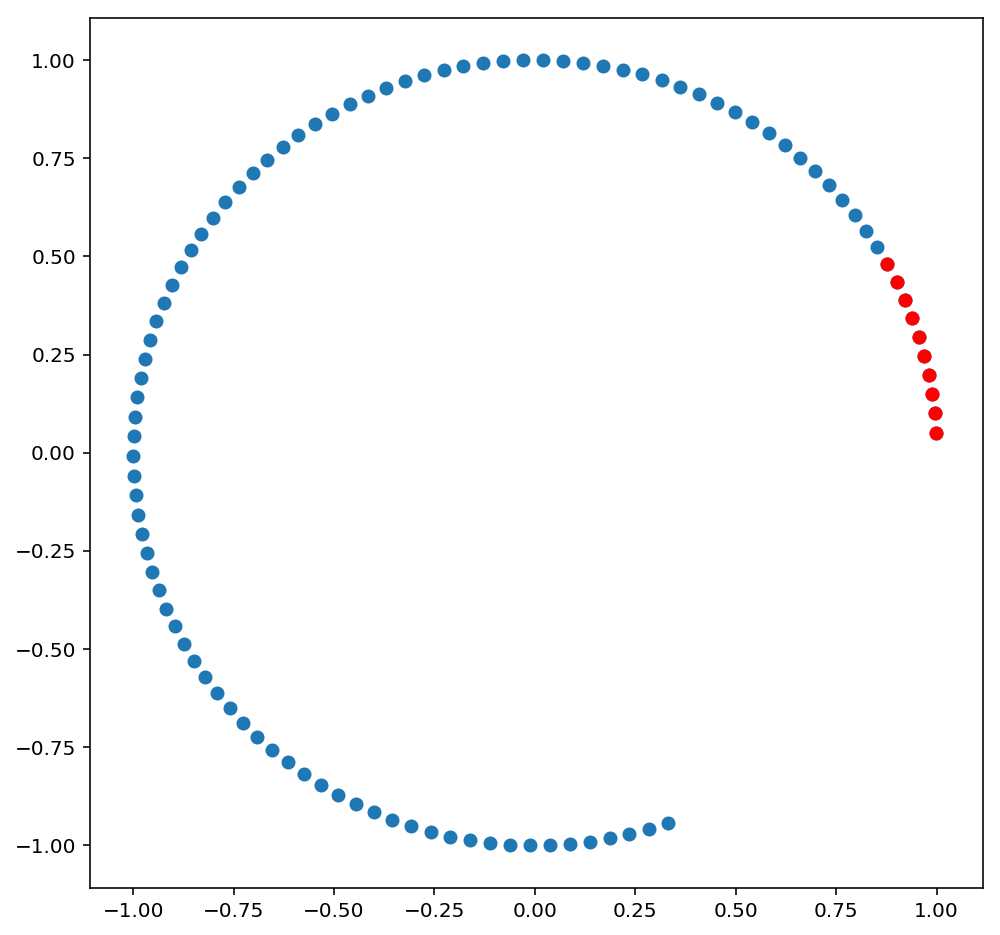

CPU times: user 539 ms, sys: 24.2 ms, total: 563 ms
Wall time: 562 ms


In [4]:
%%time
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

sim = rebound.Simulation()
sim.units = ('AU', 'Msun', 'days')
print('G = {0:1.5e}'.format(sim.G))

p = rebound.Particle(x=1., vy=1.)
M = 1.

nsamples = 101
xyz = np.zeros((nsamples, 3))
vxyz = np.zeros((nsamples, 3))

dt = 0.05

for i in range(nsamples):
    rebound.clibrebound.reb_whfast_kepler_solver(byref(sim),byref(p),c_double(M),c_int(0),c_double(dt));
    xyz[i] = p.xyz
    vxyz[i] = p.vxyz

fig,axs = plt.subplots(1,1, figsize=(8,8))
axs.scatter(xyz[:,0], xyz[:,1])
axs.scatter(xyz[:10,0], xyz[:10,1], c='r')
plt.show()

## Units Comparison

In [8]:
%%time
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

# 1
sim1 = rebound.Simulation()
# sim1.units = ('days', 'AU', 'Msun')
print('G1 = {0:1.5e}'.format(sim1.G))

# 2
sim2 = rebound.Simulation()
sim2.units = ('days', 'AU', 'Msun')
print('G2 = {0:1.5e}'.format(sim2.G))

# 1
p1 = rebound.Particle(x=1., vy=1.)
M1 = 1.

# 2
p2 = rebound.Particle(x=1., vy=1.)
M2 = 1.

nsamples = 101

# 1
xyz1 = np.zeros((nsamples, 3))
vxyz1 = np.zeros((nsamples, 3))

# 2
xyz2 = np.zeros((nsamples, 3))
vxyz2 = np.zeros((nsamples, 3))

dt = 0.05

for i in range(nsamples):
    rebound.clibrebound.reb_whfast_kepler_solver(byref(sim1),byref(p1),c_double(M1),c_int(0),c_double(dt));
    rebound.clibrebound.reb_whfast_kepler_solver(byref(sim2),byref(p2),c_double(M2),c_int(0),c_double(dt));
    xyz1[i] = p.xyz
    vxyz1[i] = p.vxyz
    xyz2[i] = p.xyz
    vxyz2[i] = p.vxyz

# fig,axs = plt.subplots(1,1, figsize=(8,8))
# axs.scatter(xyz[:,0], xyz[:,1])
# axs.scatter(xyz[:10,0], xyz[:10,1], c='r')
# plt.show()
print('XYZ Mean: {0:1.5e}'.format(np.mean(np.abs(xyz1 - xyz2))))
print('VXYZ Mean: {0:1.5e}'.format(np.mean(np.abs(vxyz1 - vxyz2))))

Date on which REBOUND was compiled: May 15 2018 11:48:39.
G1 = 1.00000e+00
G2 = 2.95912e-04
XYZ Mean: 0.00000e+00
VXYZ Mean: 0.00000e+00
CPU times: user 16.2 ms, sys: 3.19 ms, total: 19.4 ms
Wall time: 17.7 ms


# $\;$
# $\;$
# Jupiter

## Dimensionless Units $(AU, Msun, yr/2\pi)$

Date on which REBOUND was compiled: May 15 2018 11:48:39.
G =  1.00000e+00



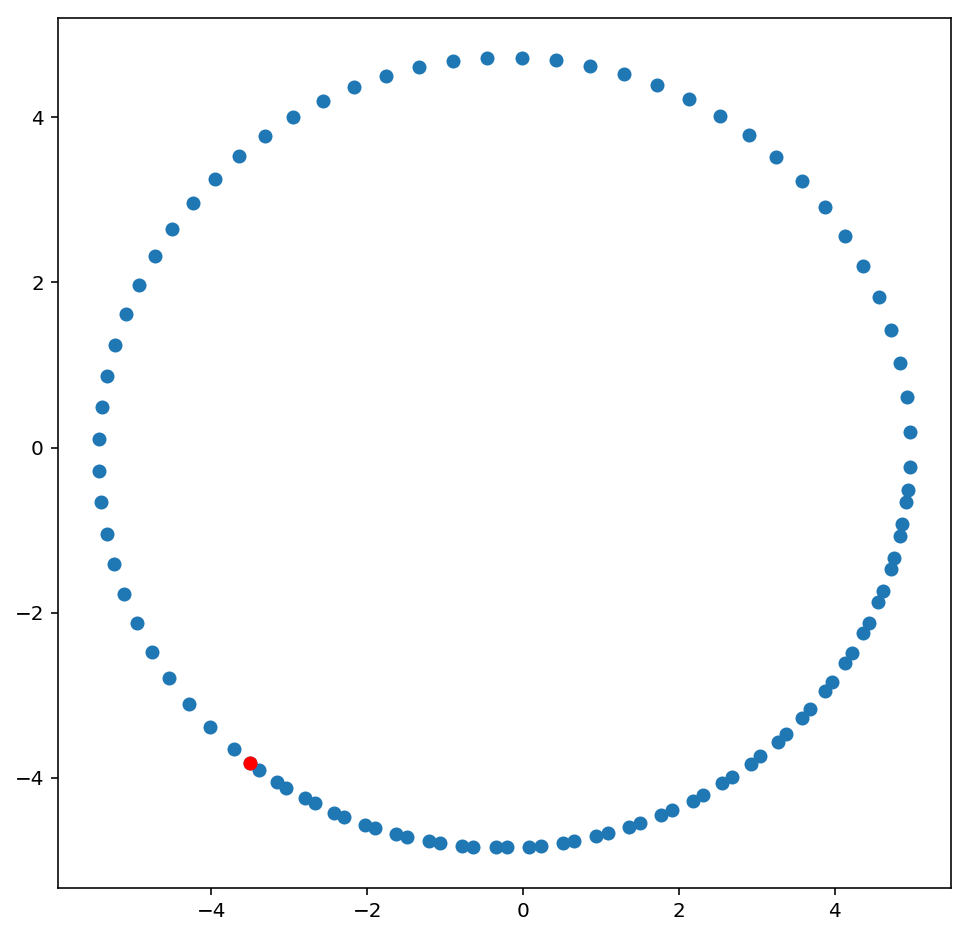

CPU times: user 501 ms, sys: 17.8 ms, total: 519 ms
Wall time: 512 ms


In [2]:
%%time
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

sim = rebound.Simulation()
print('G = {0:12.5e}\n'.format(sim.G))

fac = 365.25/(2.*np.pi)
p = rebound.Particle(x=-3.5023653, y=-3.8169847, z=-1.5507963, 
                     vx=0.00565429*fac, vy=-0.00412490*fac, vz=-0.00190589*fac)
M = 1.00000597682

nsamples = 101
xyz = np.zeros((nsamples, 3))
vxyz = np.zeros((nsamples, 3))

temp_sim = rebound.Simulation()
temp_sim.add(m=M)
temp_sim.add(p)

period = temp_sim.particles[1].P #(11.881806707101559 - 2.597033699203166e-12) # years
dt = period + 1 #/ float(nsamples)

xyz[0] = p.xyz
vxyz[0] = p.vxyz
for i in range(1,nsamples):
    rebound.clibrebound.reb_whfast_kepler_solver(byref(sim),byref(p),c_double(M),c_int(0),c_double(dt));
    xyz[i] = p.xyz
    vxyz[i] = p.vxyz

# for i in range(3):
#     print([' x', ' y', ' z'][i] + ': {0:12.5e}'.format(np.mean(xyz[:,i]) - xyz[0,i]))
#     print(['vx', 'vy', 'vz'][i] + ': {0:12.5e}'.format(np.mean(vxyz[:,i]) - vxyz[0,i]))
    
fig,axs = plt.subplots(1,1, figsize=(8,8))
axs.scatter(xyz[:,0], xyz[:,1])
axs.scatter(xyz[0,0], xyz[0,1], c='r')
plt.show()

## Gauss Units $(AU, Msun, Days)$

Date on which REBOUND was compiled: May 15 2018 11:48:39.
G =  2.95912e-04



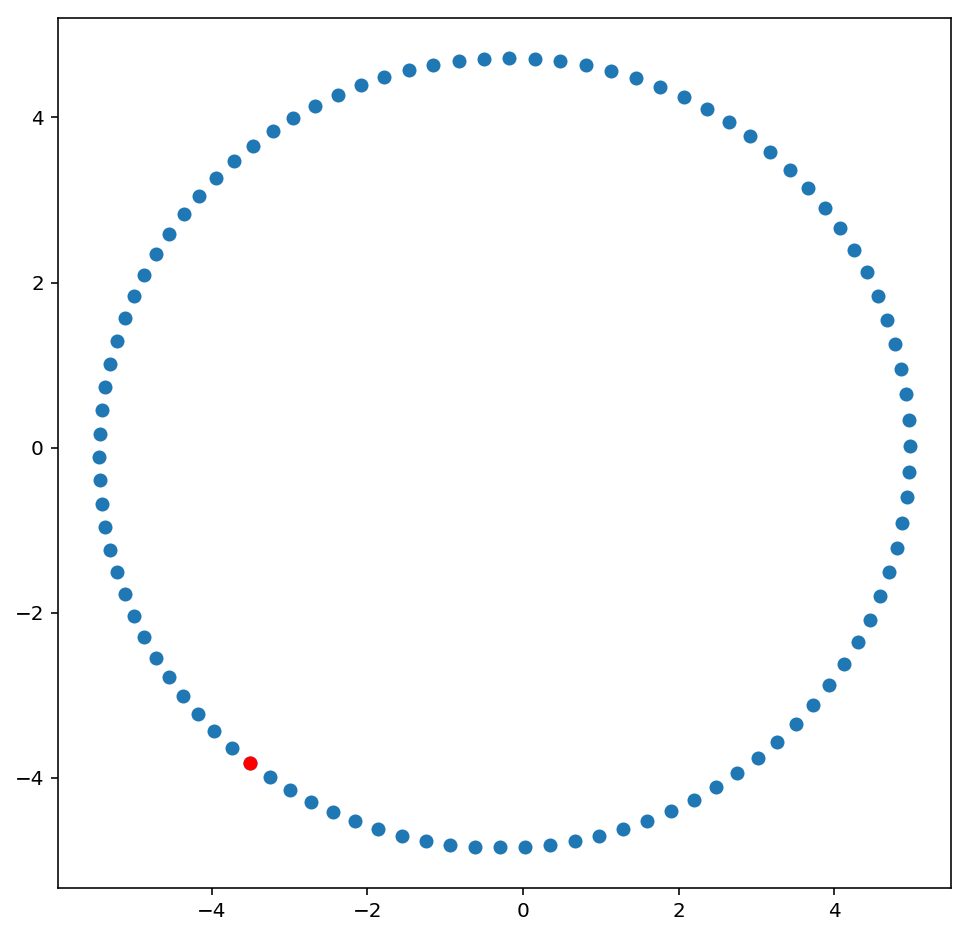

CPU times: user 493 ms, sys: 10.8 ms, total: 504 ms
Wall time: 504 ms


In [3]:
%%time
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

sim = rebound.Simulation()
sim.units = ('AU', 'Msun', 'days')
G = 2.959122082855911e-4
print('G = {0:12.5e}\n'.format(sim.G))

p = rebound.Particle(x=-3.5023653, y=-3.8169847, z=-1.5507963, vx=0.00565429, vy=-0.00412490, vz=-0.00190589)
M = 1.00000597682 * sim.G

nsamples = 101
xyz = np.zeros((nsamples, 3))
vxyz = np.zeros((nsamples, 3))

temp_sim = rebound.Simulation()
temp_sim.add(m=M)
temp_sim.add(p)

period = temp_sim.particles[1].P
dt = period / float(nsamples)

xyz[0] = p.xyz
vxyz[0] = p.vxyz
for i in range(1,nsamples):
    rebound.clibrebound.reb_whfast_kepler_solver(byref(sim),byref(p),c_double(M),c_int(0),c_double(dt));
    xyz[i] = p.xyz
    vxyz[i] = p.vxyz

# for i in range(3):
#     print([' x', ' y', ' z'][i] + ': {0:12.5e}'.format(np.mean(xyz[:,i]) - xyz[0,i]))
#     print(['vx', 'vy', 'vz'][i] + ': {0:12.5e}'.format(np.mean(vxyz[:,i]) - vxyz[0,i]))
    
fig,axs = plt.subplots(1,1, figsize=(8,8))
axs.scatter(xyz[:,0], xyz[:,1])
axs.scatter(xyz[0,0], xyz[0,1], c='r')
plt.show()

# Large Eccentricity

Date on which REBOUND was compiled: May 15 2018 11:48:39.
G = 1.00000e+00


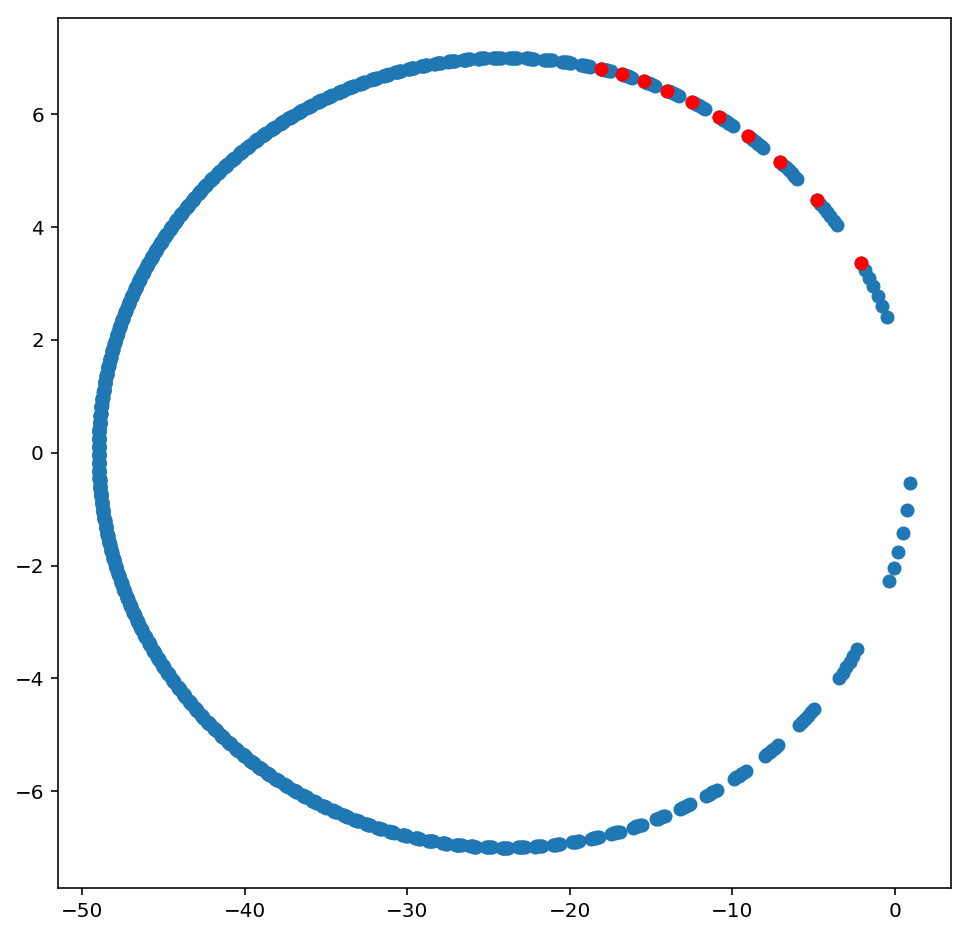

CPU times: user 526 ms, sys: 19.3 ms, total: 545 ms
Wall time: 538 ms


In [11]:
%%time
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

sim = rebound.Simulation()
print('G = {0:1.5e}'.format(sim.G))

p = rebound.Particle(x=1., vy=1.4)
M = 1.

nsamples = 1001
xyz = np.zeros((nsamples, 3))
vxyz = np.zeros((nsamples, 3))

dt = 5.

for i in range(nsamples):
    rebound.clibrebound.reb_whfast_kepler_solver(byref(sim),byref(p),c_double(M),c_int(0),c_double(dt));
    xyz[i] = p.xyz
    vxyz[i] = p.vxyz

fig,axs = plt.subplots(1,1, figsize=(8,8))
axs.scatter(xyz[:,0], xyz[:,1])
axs.scatter(xyz[:10,0], xyz[:10,1], c='r')
plt.show()

# Multiple Planets

Date on which REBOUND was compiled: May 15 2018 11:48:39.
G = 1.00000e+00


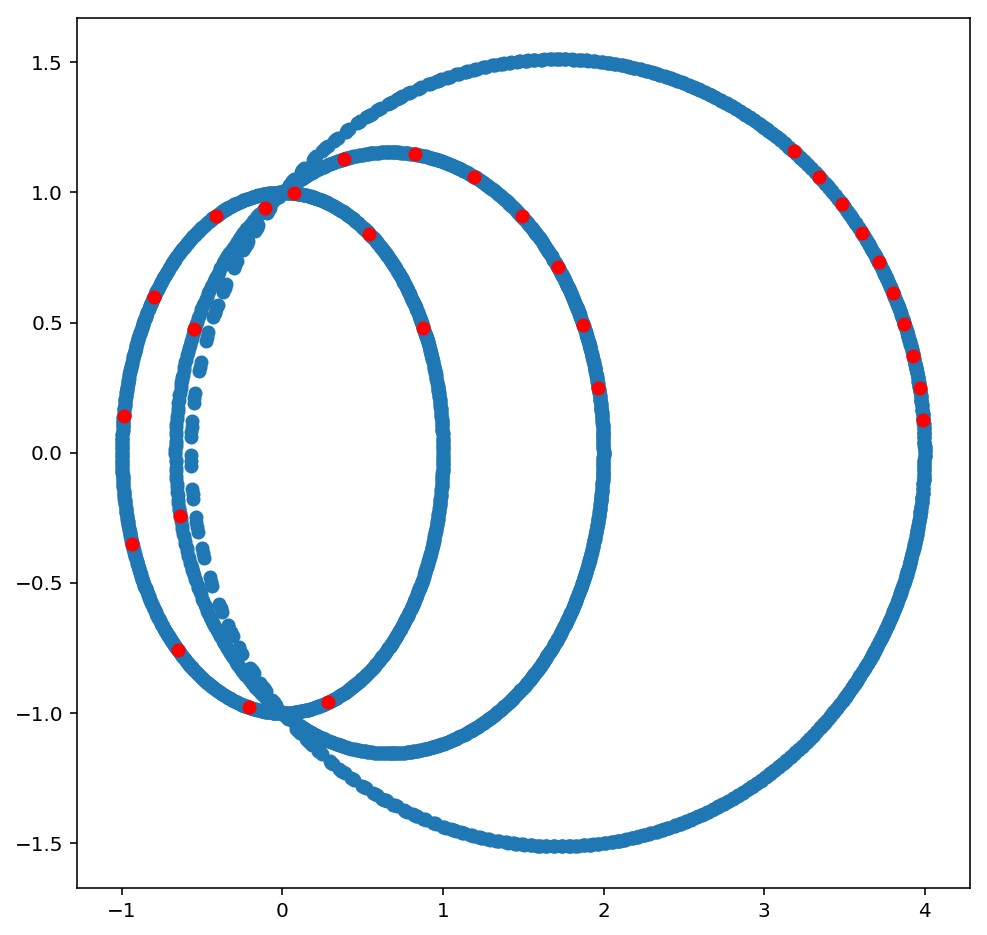

CPU times: user 978 ms, sys: 68.9 ms, total: 1.05 s
Wall time: 1.07 s


In [1]:
%%time
import rebound
import numpy as np
from ctypes import c_double, byref, c_int
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("Date on which REBOUND was compiled: {}.".format(rebound.__build__))

sim = rebound.Simulation()
print('G = {0:1.5e}'.format(sim.G))

p = [rebound.Particle(x=1., vy=1.), rebound.Particle(x=2., vy=0.5), rebound.Particle(x=4., vy=0.25)]
M = 1.

nsamples = 1001
xyz = np.zeros((nsamples, 3, 3))
vxyz = np.zeros((nsamples, 3, 3))

dt = 0.5

for i in range(nsamples):
    for j in range(3):
        rebound.clibrebound.reb_whfast_kepler_solver(byref(sim),byref(p[j]),c_double(M),c_int(0),c_double(dt));
        xyz[i,j] = p[j].xyz
        vxyz[i,j] = p[j].vxyz

fig,axs = plt.subplots(1,1, figsize=(8,8))
axs.scatter(xyz[:,:,0], xyz[:,:,1])
axs.scatter(xyz[:10,:,0], xyz[:10,:,1], c='r')
plt.show()

In [ ]:
xyz[timestep, planet+coord]